## Importing Packages & Read data :

In [1]:
import pandas as pd
df = pd.DataFrame()

In [2]:
df = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
# parse_dates=True .. pandas treat it like date, not any random string
df.index.freq = 'MS'

In [3]:
df.head()  # Random monthly data.. 
# convert this data to Supervised learning
# For supervised learning, need input data & output data
# ..have to make an output column

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<AxesSubplot:xlabel='DATE'>

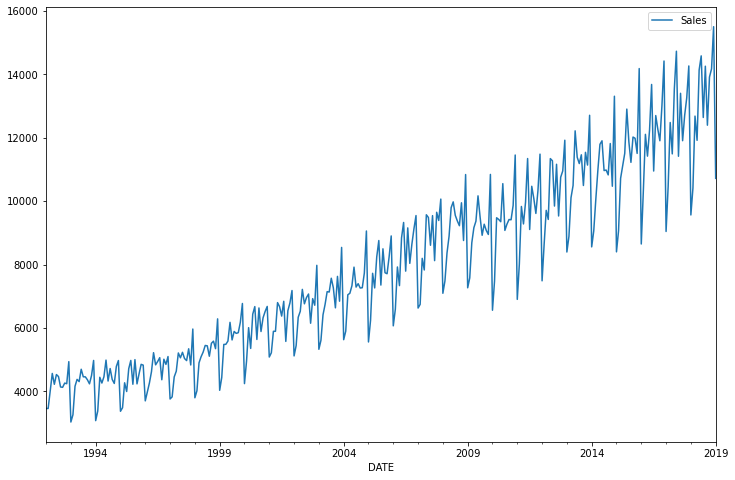

In [6]:
df.columns = ['Sales']
df.plot(figsize = (12,8))

## Supervised Learning (ML) :

so we have to create, input & output training data.

.. to train our ML model. Creating training data :

Input column  -->  Output column
.. using past month data, to predict current month data

In [7]:
df['Sale_LastMonth'] = df['Sales'].shift(+1)
# We can use pmdarima -> auto-arima .. to predict order
# How many past data needed to consider to predict future data.
df['Sale_2Monthsback'] = df['Sales'].shift(+2)
df['Sale_3Monthsback'] = df['Sales'].shift(+3)
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


There are many NaN values .... need to be removed.

In [8]:
df.dropna(inplace = True)  # dropping NaN values.
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


## Creating ML Model :
Now, input & output dataset is ready.

Can call any Regression ML model.. to predict data.

### Linear Regression model :

In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

### Random Forest model :

In [10]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
# the arguments above, they just go good with RandomForest function

In [11]:
# Data Processing .. needed to be done.
import numpy as np  # numpy -> to simplify data processing

x1 = np.array(df['Sale_LastMonth']).reshape(-1,1)
x2 = np.array(df['Sale_2Monthsback']).reshape(-1,1)
x3 = np.array(df['Sale_3Monthsback']).reshape(-1,1)
# .reshape(-1,1)  -->  -1 in row -->  don't care about no. of rows.
y = np.array(df['Sales']).reshape(-1,1) # Output array
final_x = np.concatenate((x1, x2, x3), axis=1) # Input array
# axis=1  -->  Concatenate along y-axis .. merge corresponding rows.
print(final_x)
# LastMonth  2Monthsback  3Monthsback  -->  Each row of Input-data

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

## Training Models :

Linear Regression, Random Forest

In [12]:
# Testing data  :  last 30 entries
# Training data  :  Remaining data
x_train, x_test = final_x[ :-30], final_x[-30: ]
y_train, y_test = y[ :-30], y[-30: ]

In [13]:
model.fit(x_train, y_train)  # Random Forest model
lin_model.fit(x_train, y_train)  # Linear Regression

<ipython-input-13-e00ae1bda2c0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)  # Random Forest model


LinearRegression()

## Making Prediction on Test data :

Random Forest Predictions :

In [17]:
pred = model.predict(x_test)

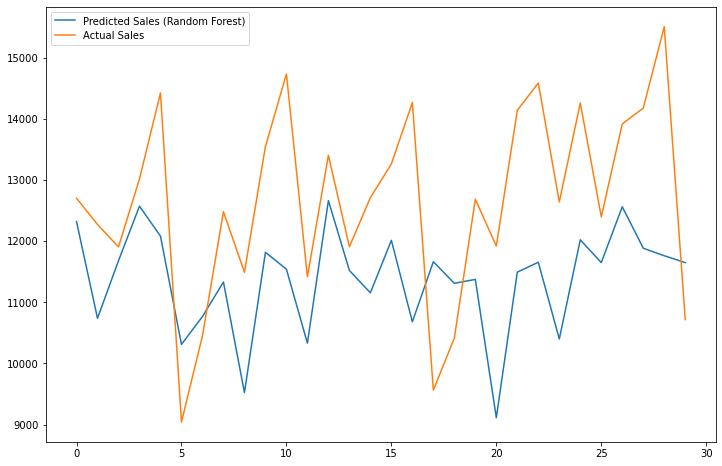

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label='Predicted Sales (Random Forest)')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc = "upper left")
plt.show()

Linear Regression predictions :

In [19]:
lin_pred = lin_model.predict(x_test)

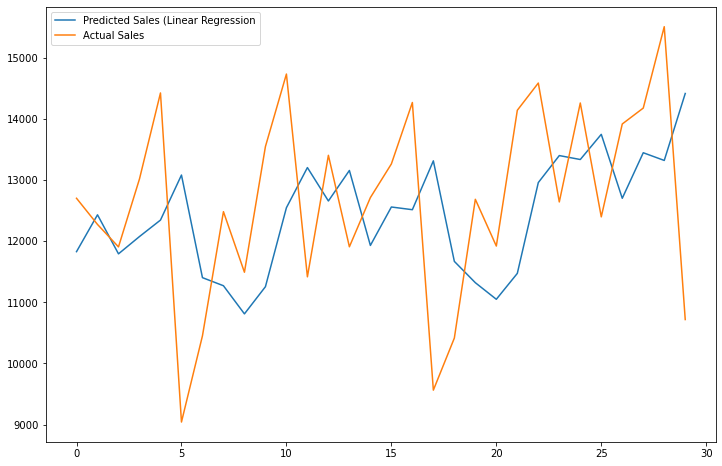

In [20]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred, label="Predicted Sales (Linear Regression")
plt.plot(y_test, label="Actual Sales")
plt.legend(loc = "upper left")
plt.show()

## Calculating Errors :

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred, y_test))
lin_rmse = sqrt(mean_squared_error(lin_pred, y_test))
print("RMS error (Random Forest) : ", rmse)
print("RMS error (Linear Regression) : ", lin_rmse)

RMS error (Random Forest) :  1913.7762399350665
RMS error (Linear Regression) :  1791.4965232759828


## Conclusion :

Error in Random Forest  >  Error in Linear Regression

Linear Regression model performs better.